In [2]:
%pip install torch torchvision torchaudio
%pip install pandas
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.7.0+cu126


# Introduction to [tensors](https://docs.pytorch.org/docs/stable/tensors.html)
A tensor is a generalized container for numbers — an extension of scalars, vectors, and matrices to any number of dimensions.
| Type      | Also Known As      | Example                            | Shape                   |
| --------- | ------------------ | ---------------------------------- | ----------------------- |
| Scalar    | 0D tensor          | `5`                                | `()`                    |
| Vector    | 1D tensor          | `[5, 8, -3]`                       | `(3,)`                  |
| Matrix    | 2D tensor          | `[[1, 2], [3, 4]]`                 | `(2, 2)`                |
| 3D Tensor | Tensor of matrices | `[[[...], [...]], [[...], [...]]]` | `(2, 2, 2)`             |
| nD Tensor | n-dimensional      | Depends on the application         | e.g., `(64, 3, 32, 32)` |

## Why Are Tensors Important in Machine Learning?
- Data Representation: Everything — images, audio, text, videos — can be converted into tensors.
- Frameworks: ML frameworks like PyTorch and TensorFlow use tensors as their basic building blocks.
- Hardware Acceleration: Tensors are optimized for GPU computation.
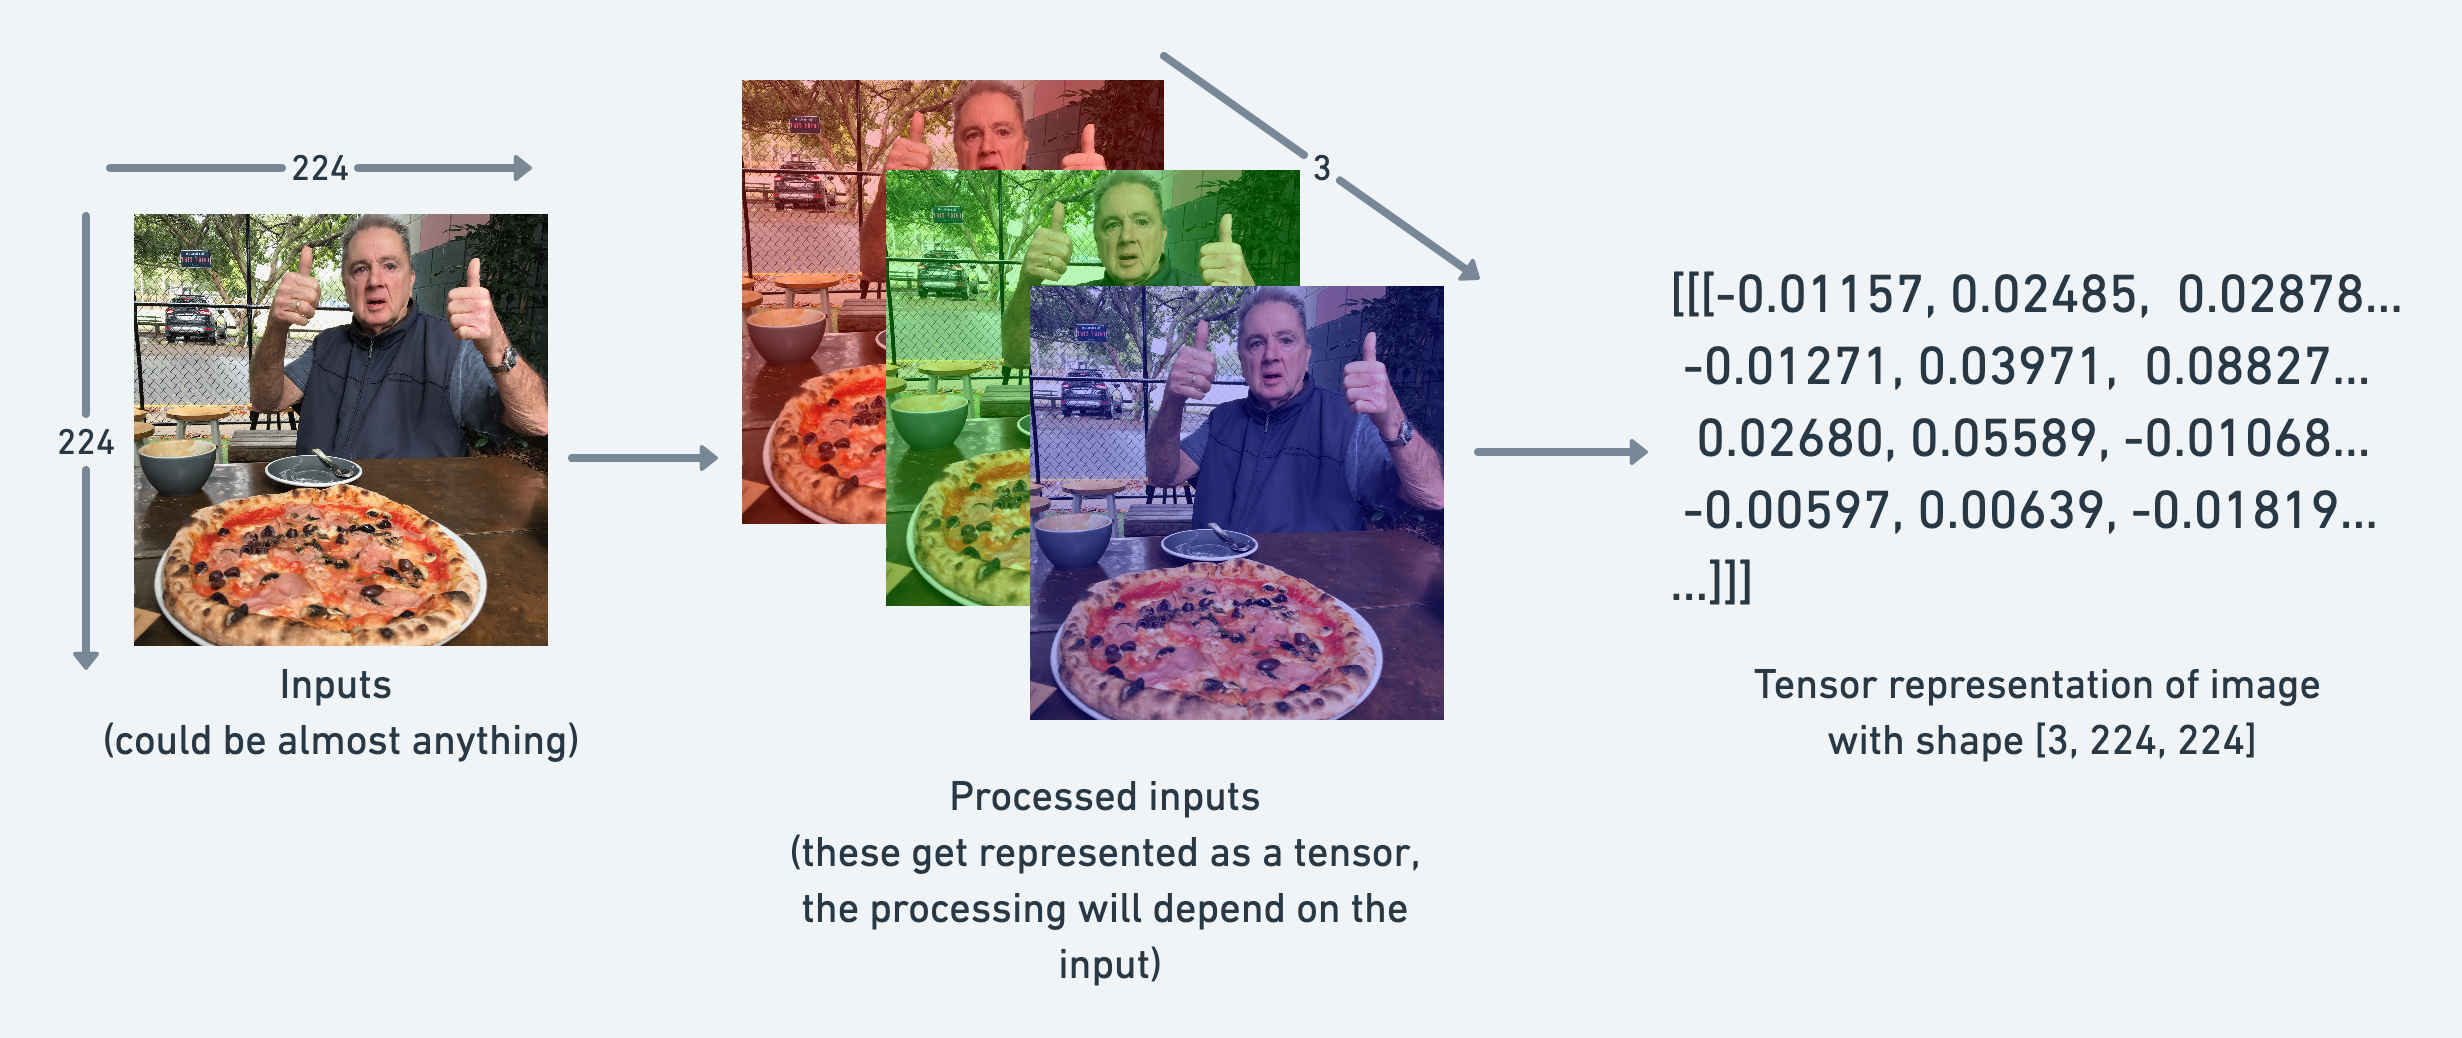

# Types of Tensors
| Tensor Type   | Rank | Description                        | Example                            |
| ------------- | ---- | ---------------------------------- | ---------------------------------- |
| **Scalar**    | 0    | A single number                    | `5` (e.g., loss value)             |
| **Vector**    | 1    | A list of numbers                  | `[1, 2, 3]`                        |
| **Matrix**    | 2    | A 2D grid of numbers (rows × cols) | `[[1, 2], [3, 4]]`                 |
| **3D Tensor** | 3    | A stack of matrices                | `[[[...], [...]], [[...], [...]]]` |
| **4D Tensor** | 4    | A batch of 3D tensors              | `(batch, channel, height, width)`  |
| **nD Tensor** | n≥5  | Higher-dimensional data            | For videos, NLP, etc.              |

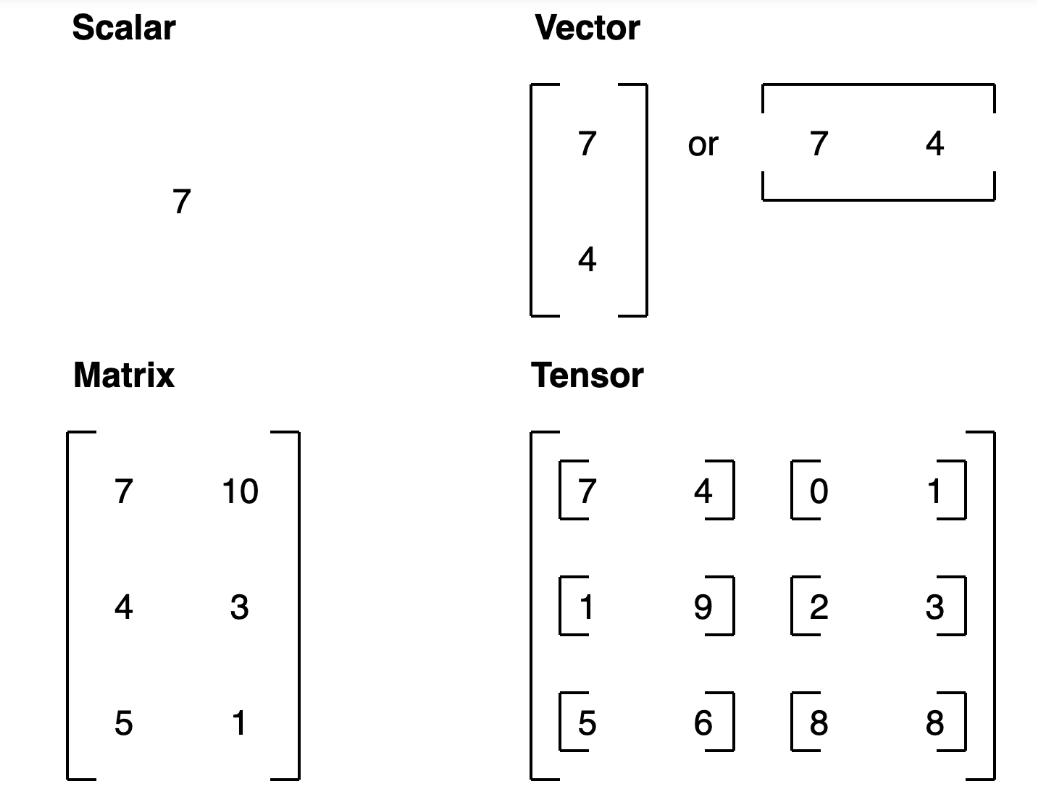

## 1. scalar
A scalar is just a single number.
No direction, no dimensions. Just value.

In [4]:
# scalar
x = torch.tensor(7)
print(x)

tensor(7)


In [5]:
# a scalar has zero dimensions
scalar = torch.tensor(7)
print(scalar.ndimension())

0


What if we wanted to retrieve the number from the tensor?
As in, turn it from torch.Tensor to a Python integer?
To do we can use the item() method.

In [6]:
# if we want to get the value of a scalar as a python integer or float we can use the .item() method
scalar.item()

7

## 2. Vector
A vector is a list or an array of numbers.
It has magnitude and direction.
It lives in 1D space (like a line).


In [7]:
#vector
vector = torch.tensor([7, 7])
print(vector)

tensor([7, 7])


In [8]:
# a vector has one dimension
vector.ndimension()

1


Hmm, that's strange, vector contains two numbers but only has a single dimension.
You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside ([) and you only need to count one side.
How many square brackets does vector have?


In [9]:
# we can get the number of elements in a vector using the .numel() method
vector.numel()

2

Another important concept for tensors is their shape attribute. The shape tells you how the elements inside them are arranged.

In [10]:
# we can also get the shape of a vector using the .shape attribute. Shape is a property of a tensor that tells us how many elements are in each dimension.
vector.shape

torch.Size([2])


The above returns torch.Size([2]) which means our vector has a shape of [2]. This is because of the two elements we placed inside the square brackets ([7, 7]).

## 3. Matrix
A matrix is a 2D array of numbers.
It has rows and columns.
It lives in 2D space (like a plane).

In [11]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
print(MATRIX)

tensor([[ 7,  8],
        [ 9, 10]])


In [12]:
# a matrix has two dimensions
MATRIX.ndimension()

2

In [13]:
# we can get the number of elements in a matrix using the .numel() method
MATRIX.numel()

4

In [14]:
# we can also get the shape of a matrix using the .shape attribute
MATRIX.shape

torch.Size([2, 2])


We get the output torch.Size([2, 2]) because MATRIX is two elements deep and two elements wide.

In [15]:
print (MATRIX[0])
print (MATRIX[1])
print (MATRIX[:, 0])

tensor([7, 8])
tensor([ 9, 10])
tensor([7, 9])


## 4. Tensors
A tensor is a n-dimensional array of numbers.
It lives in n-dimensional space.
It can be 0D, 1D, 2D, 3D, 4D, etc.
It can be used to represent scalars, vectors, matrices, and more.

In [16]:
# tensor

TENSOR = torch.tensor([[[1, 2, 3],]])
print(TENSOR)

tensor([[[1, 2, 3]]])


In [17]:
# tensor has three dimensions
print (TENSOR.ndimension())

3


In [18]:
# we can get the number of elements in a tensor using the .numel() method
print (TENSOR.numel())

3


In [19]:
# we can also get the shape of a tensor using the .shape attribute
print (TENSOR.shape)

torch.Size([1, 1, 3])


Alright, it outputs torch.Size([1, 3, 3]).
The dimensions go outer to inner.
That means there's 1 dimension of 3 by 3.
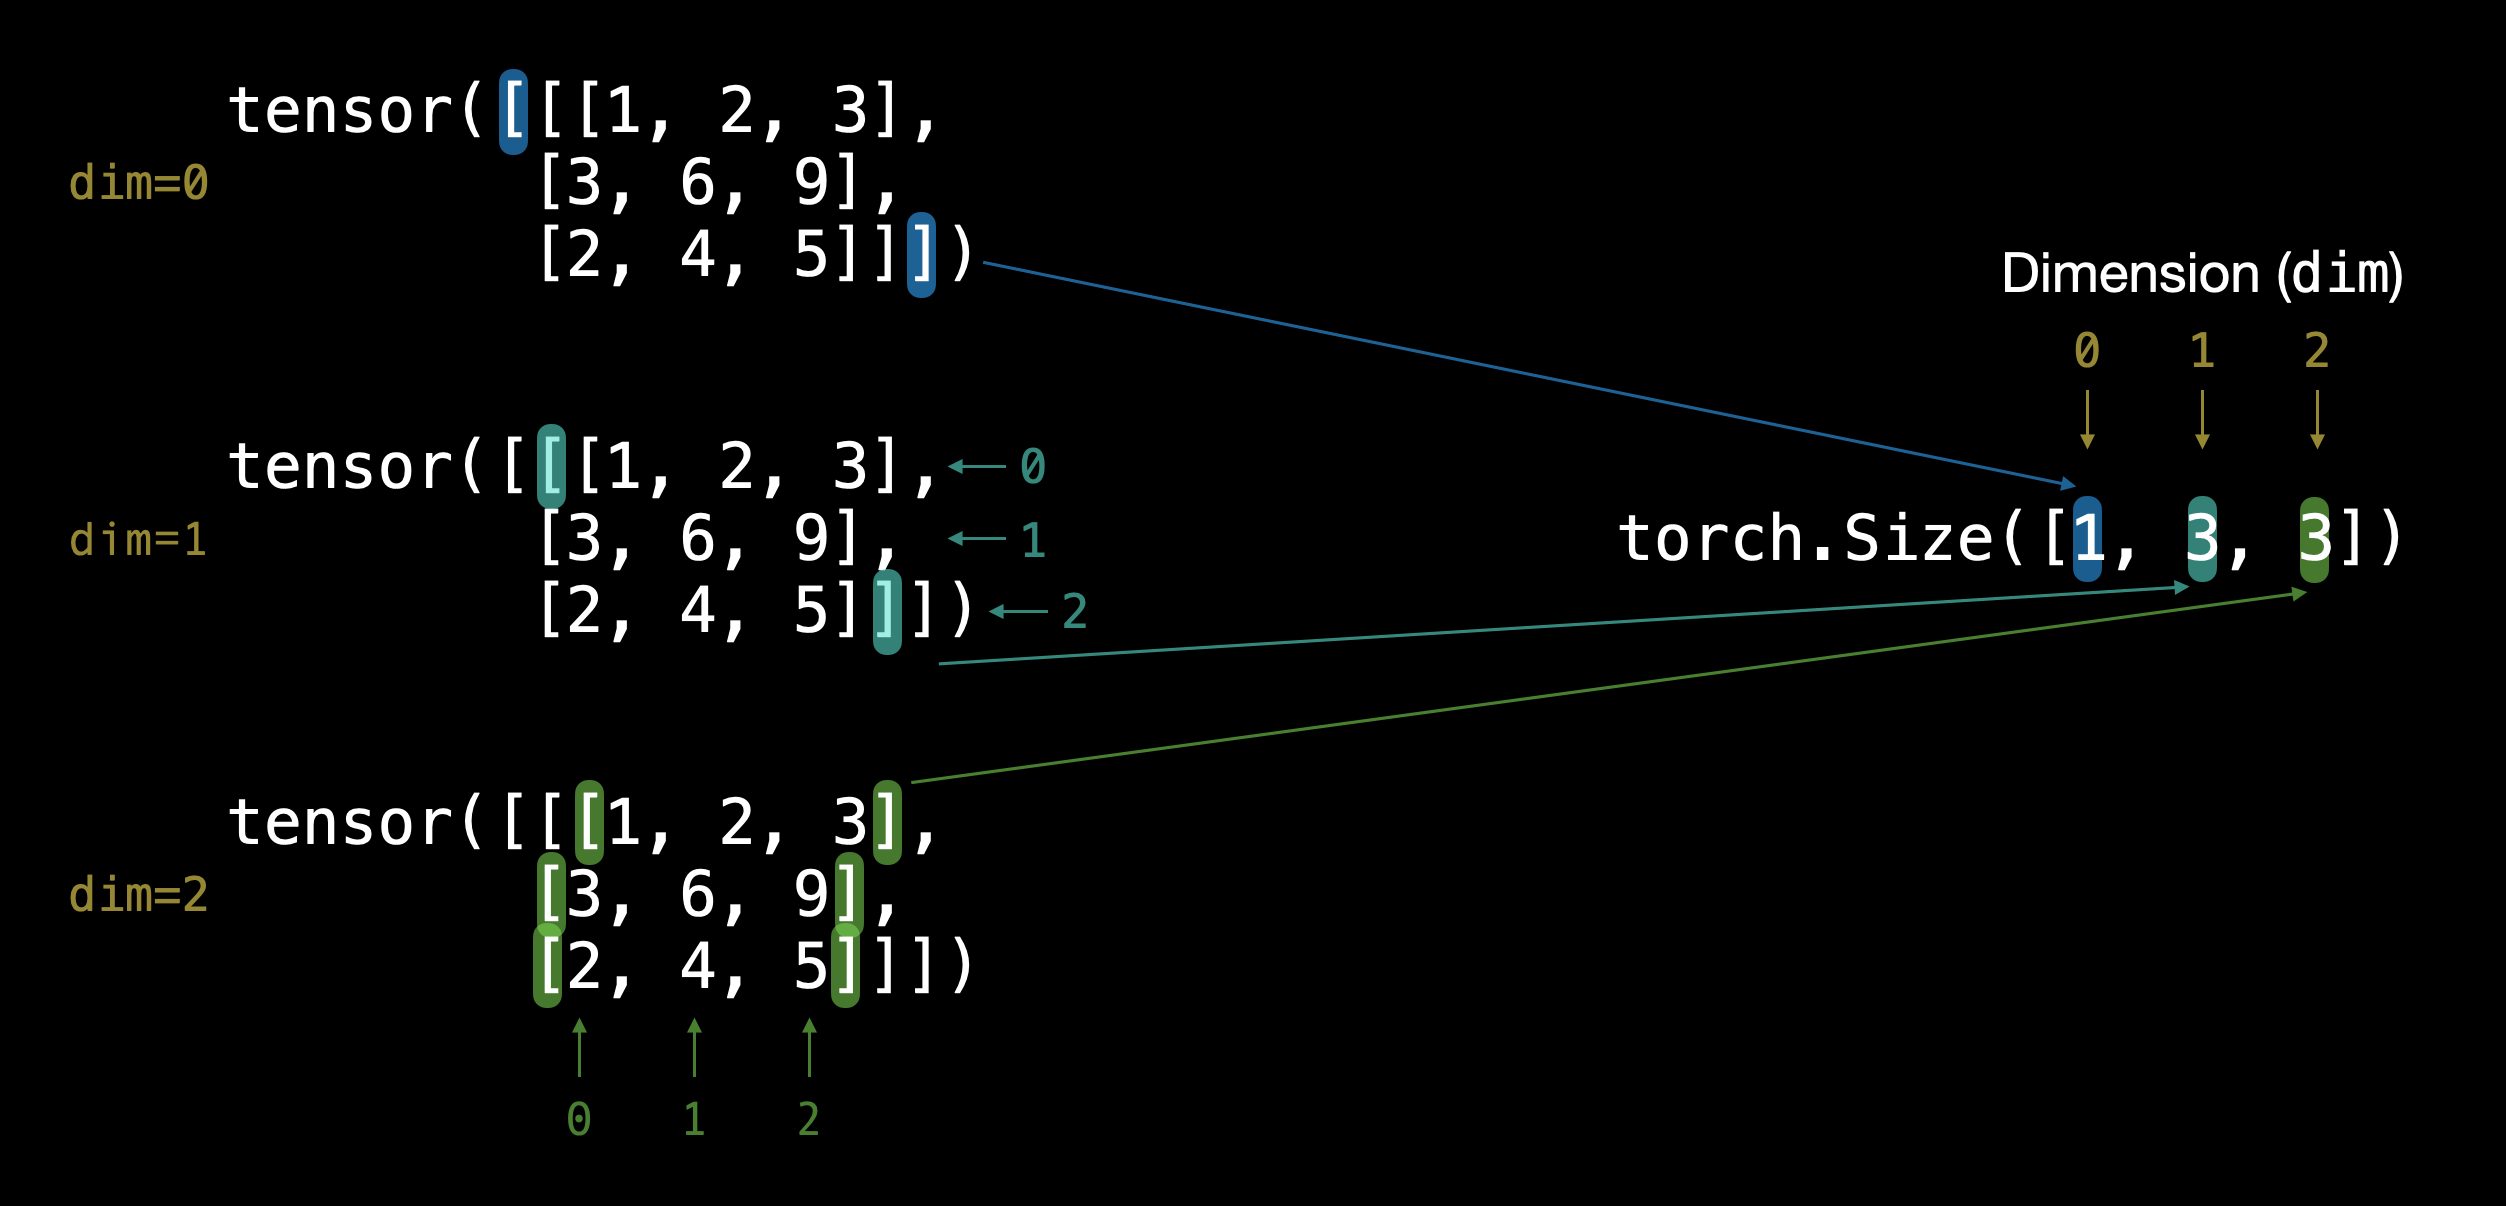

**Note:** You might've noticed me using lowercase letters for scalar and vector and uppercase letters for MATRIX and TENSOR. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as y or a. And matrices and tensors denoted as uppercase letters such as X or W.

You also might notice the names martrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with torch.Tensors (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

## Random Tensors

machine learning models such as neural networks manipulate and seek patterns within tensors.
But when building machine learning models with PyTorch, it's rare you'll create tensors by hand (like what we've been doing).
Instead, a machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

**Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...**

As a data scientist, you can define how the machine learning model starts (initialization), looks at data (representation) and updates (optimization) its random numbers.

In [26]:
# create a random tensor of size (3,4)
random_tensor = torch.rand(1, 10, 9)
print(random_tensor)
print(random_tensor.ndim)

tensor([[[0.3100, 0.2995, 0.4192, 0.4014, 0.6915, 0.4465, 0.6465, 0.3201,
          0.7577],
         [0.4422, 0.6680, 0.5565, 0.4314, 0.1742, 0.2921, 0.6733, 0.4721,
          0.5998],
         [0.1010, 0.4525, 0.5773, 0.3674, 0.0738, 0.6926, 0.0276, 0.0680,
          0.6268],
         [0.1694, 0.0166, 0.6965, 0.5974, 0.9607, 0.9641, 0.7292, 0.1571,
          0.1312],
         [0.4147, 0.6563, 0.5060, 0.5592, 0.3404, 0.0552, 0.2075, 0.1866,
          0.7179],
         [0.9710, 0.6971, 0.9224, 0.6291, 0.7588, 0.1782, 0.5619, 0.8314,
          0.2300],
         [0.3997, 0.5279, 0.5094, 0.1907, 0.4937, 0.8373, 0.1543, 0.6858,
          0.1199],
         [0.5015, 0.4555, 0.9803, 0.6988, 0.7239, 0.0332, 0.9732, 0.6565,
          0.3247],
         [0.8307, 0.1773, 0.5218, 0.8946, 0.6650, 0.1827, 0.9252, 0.7870,
          0.0987],
         [0.5923, 0.4146, 0.2415, 0.6223, 0.2515, 0.1938, 0.3362, 0.8302,
          0.1161]]])
3


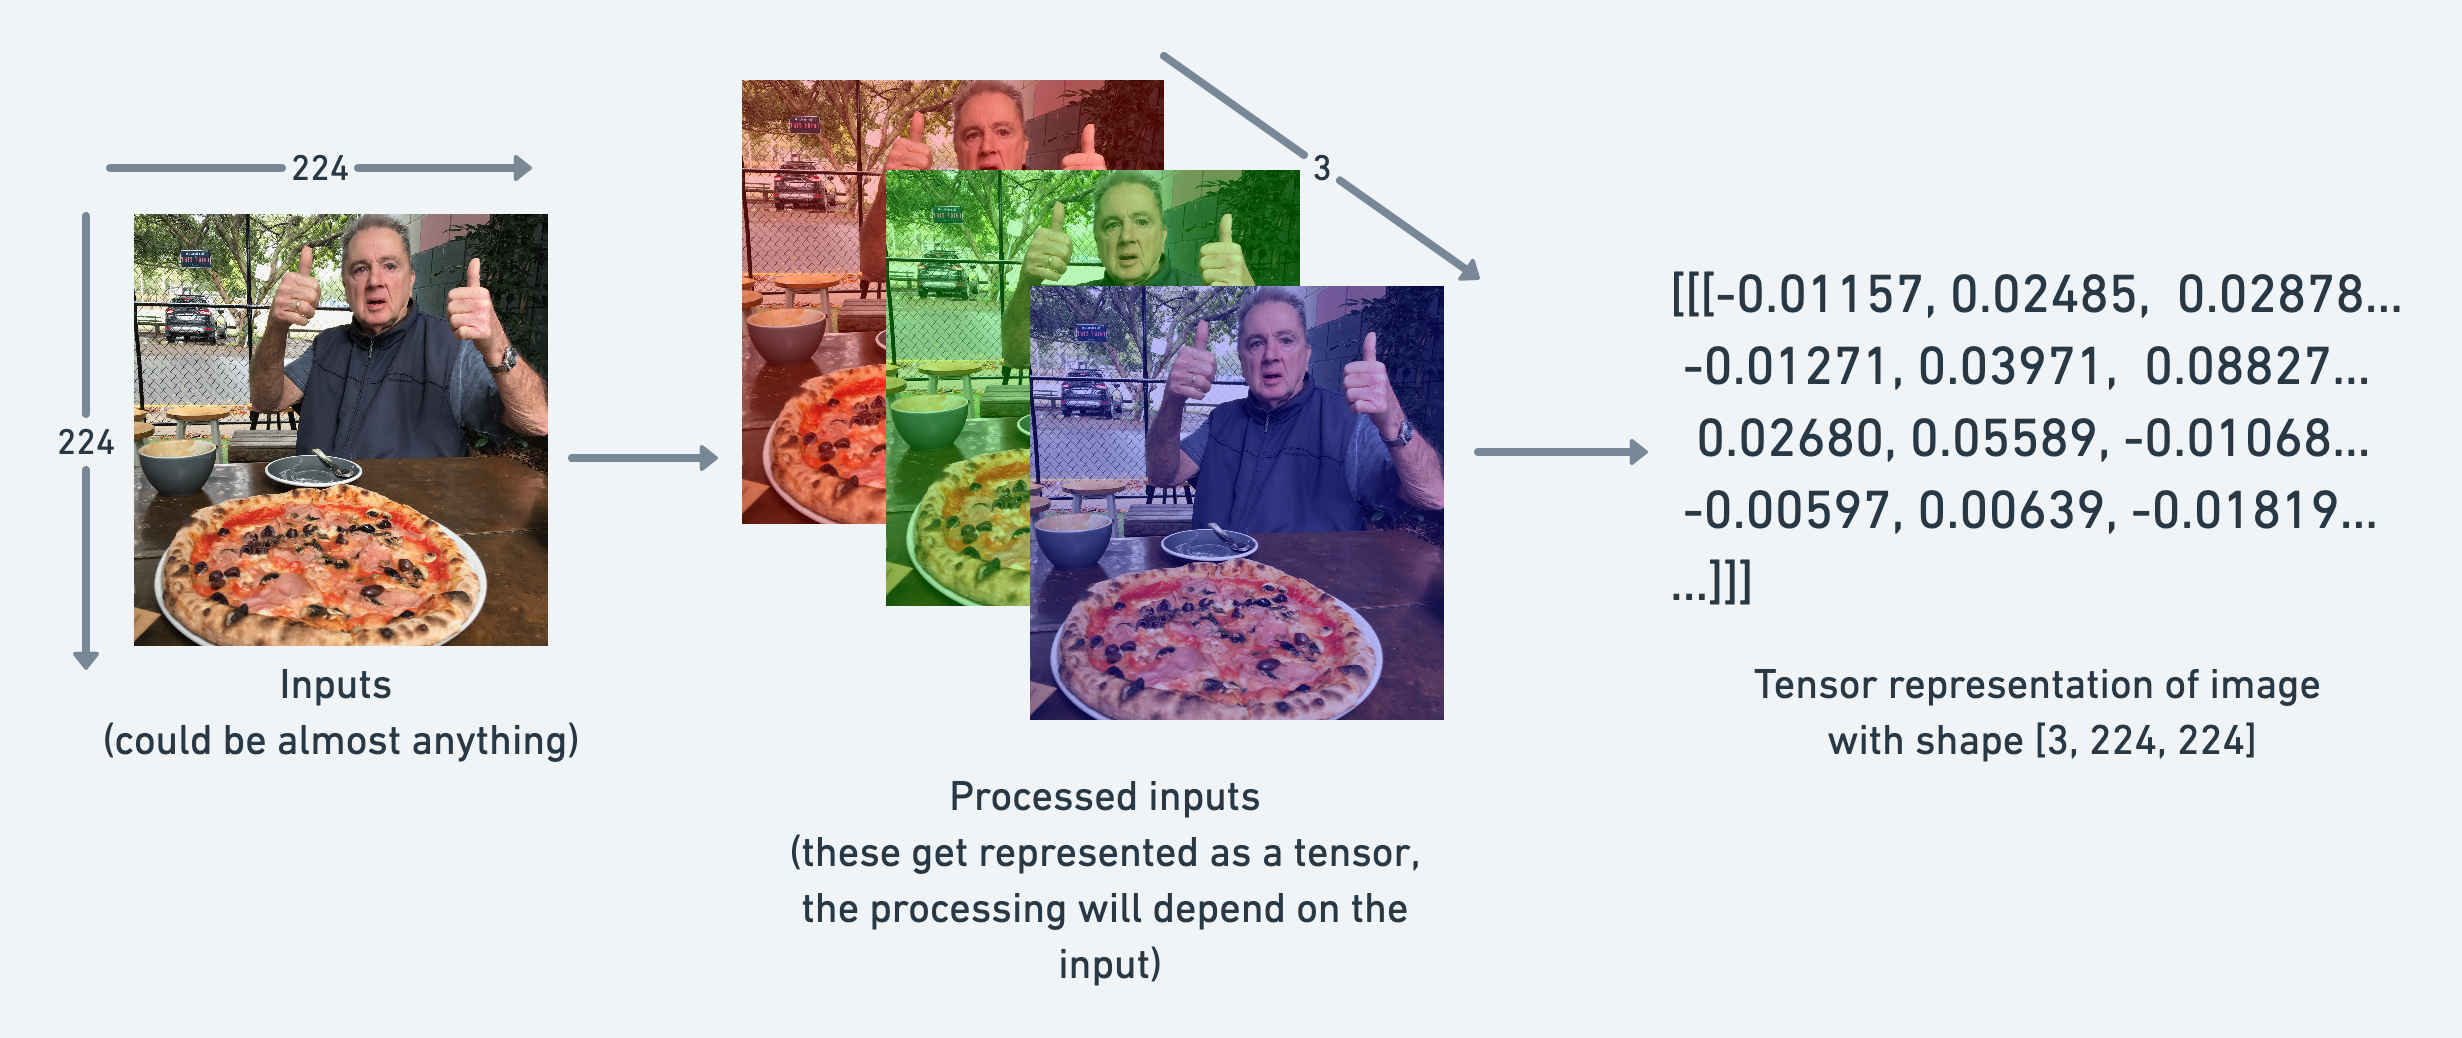
you could represent an image as a tensor with shape [3, 224, 224] which would mean [colour_channels, height, width], as in the image has 3 colour channels (red, green, blue), a height of 224 pixels and a width of 224 pixels.

In [23]:
# create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3, 224, 224))
print(random_image_size_tensor.shape)
print(random_image_size_tensor.ndim)

torch.Size([3, 224, 224])
3


## Zeros and ones
Sometimes you'll just want to fill tensors with zeros or ones.

This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).

In [28]:
# create a tensor of all zeros
zeros = torch.zeros(size=(1 , 10 , 9))
print(zeros)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.]]])


We can do the same to create a tensor of all ones except using torch.ones() instead.

In [29]:
# create a tensor of all ones
ones = torch.ones(size=(3, 4))
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [30]:
# You can mask out the numbers in a tensor by multiplying it.
zeros*random_tensor


tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

## Creating a range and tensors like
Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use torch.arange(start, end, step) to do so.

Where:

start = start of range (e.g. 0)
end = end of range (e.g. 10)
step = how many steps in between each value (e.g. 1)

In [31]:
# use torch.arange()
one_to_ten = torch.arange(start=1, end=11, step=1)
print(one_to_ten)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor.

To do so you can use torch.zeros_like(input) or torch.ones_like(input) which return a tensor filled with zeros or ones in the same shape as the input respectively.

In [32]:
# creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
print(ten_zeros)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


xc